# Bosque Fray Jorge y su microclima

¬øPor que es una zona de interes?
- Ecosistema Relictio
- Alberga especies en extincion
- Especies end√©micas de Chile
- La conservaci√≥n de esta √°rea se debe principalmente a que en ella se presenta un bosque tipo valdiviano


**Bosque Valdiviano**:
Templado lluvioso u oce√°nico, con precipitaciones abundantes a lo largo del a√±o y temperaturas frescas.

Como Fray Jorge no tiene preicpitaciones altas anualmente, la camanchaca es la que afecta directameante en como se sustenta este parque.

M√°s informacion puedes dar click [aqui](https://simbio.mma.gob.cl/CbaAP/Details/955#limites)

## Mapa interctivo

In [1]:
import zipfile
import xml.etree.ElementTree as ET
import folium

kmz_path = 'Bosque Fray Jorge.kmz'

# 2. Extraer el archivo .kml desde el .kmz
with zipfile.ZipFile(kmz_path, 'r') as z:
    kml_filename = [f for f in z.namelist() if f.endswith('.kml')][0]
    kml_content = z.read(kml_filename).decode(
        'utf-8', errors='ignore')  # leer como texto

# 3. Parsear el contenido del KML
root = ET.fromstring(kml_content)
ns = {'kml': 'http://www.opengis.net/kml/2.2'}

# 4. Extraer Placemarks con nombre y coordenadas
placemarks = []
for pm in root.findall('.//kml:Placemark', ns):
    name = pm.find('kml:name', ns)
    coords = pm.find('.//kml:coordinates', ns)
    placemarks.append({
        'Nombre': name.text if name is not None else 'Sin nombre',
        'Coordenadas': coords.text.strip() if coords is not None else 'Sin coordenadas'
    })

# 5. Crear mapa interactivo con folium
# Centrar el mapa en la primera coordenada
coord_str = placemarks[0]['Coordenadas'].split()[0]
lon, lat, *_ = map(float, coord_str.split(','))

m = folium.Map(location=[lat, lon], zoom_start=13)

# Agregar todos los marcadores
for pm in placemarks:
    coord_str = pm['Coordenadas'].split()[0]
    lon, lat, *_ = map(float, coord_str.split(','))
    folium.Marker(location=[lat, lon], popup=pm['Nombre']).add_to(m)

# 6. Mostrar mapa- SOLO EN JUPYTER
m

## Algunas imagenes del parque

<img src= "images/frayjorge.jpg" width="800" height="800" alt="Descripci√≥n de la imagen">

<img src= "images/mirador_frayjorge.webp" width="800" height="800" alt="Descripci√≥n de la imagen">

## Algunas preguntas que podemos responder con los datos de Fray Jorge:

### Datasets y prefiltrado de informaci√≥n

<img src="images/pagRec.png" width="800" height="800" alt="Descripci√≥n de la imagen">

In [2]:
# Dataframes a utilizar ya tratados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
df = pd.read_csv('csv/dataset01.csv', sep=';', encoding='utf-8')
df_temp = pd.read_csv('csv/TempA-B.csv', sep=';', encoding='utf-8')

# Mejora de legibilidad de los nombres de las columnas
df.rename(columns={
    'Fray Jorge Bosque[IEB]-Precipitaci√≥n[mm]': 'Precipitaci√≥nBosque(mm)',
    'Fray Jorge Bosque[IEB]-Humedad Relativa[%]': 'H_RelativaBosque(%)',
    'Fray Jorge Bosque[IEB]-Temperatura de Suelo[¬∞C]': 'TemperaturaBosqueS(C)',
    'Fray Jorge Quebrada [IEB]-Temperatura de Suelo[¬∞C]': 'T_SueloQuebrada(C)',
    'Fray Jorge Quebrada [IEB]-Temperatura del Aire[¬∞C]': 'T_AireQuebrada(C)',
}, inplace=True)


# Convertir las columnas relevantes a tipo num√©rico
df['Precipitaci√≥nBosque(mm)'] = pd.to_numeric(
    df['Precipitaci√≥nBosque(mm)'], errors='coerce')
df['H_RelativaBosque(%)'] = pd.to_numeric(
    df['H_RelativaBosque(%)'], errors='coerce')
df['TemperaturaBosqueS(C)'] = pd.to_numeric(
    df['TemperaturaBosqueS(C)'], errors='coerce')
df['T_SueloQuebrada(C)'] = pd.to_numeric(
    df['T_SueloQuebrada(C)'], errors='coerce')
df['T_AireQuebrada(C)'] = pd.to_numeric(
    df['T_AireQuebrada(C)'], errors='coerce')
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

print(df.head())
print(df_temp.head())

       Fecha  H_RelativaBosque(%)  Precipitaci√≥nBosque(mm)  \
0 2010-01-01                89.90                      3.7   
1 2010-02-01                87.02                      1.7   
2 2010-03-01                90.44                      4.7   
3 2010-04-01                86.34                      1.9   
4 2010-05-01                85.44                     34.3   

   TemperaturaBosqueS(C)  T_SueloQuebrada(C)  T_AireQuebrada(C)  
0                  19.49               23.80              16.83  
1                  19.65               23.01              16.71  
2                  18.00               21.89              16.27  
3                  14.73               18.43              13.53  
4                  12.27               15.32              12.48  
        Fecha Fray Jorge Bosque[IEB]-Temperatura del Aire[¬∞C]
0  01/01/2010                                           13.21
1  01/02/2010                                           13.54
2  01/03/2010                              

## Entre los a√±os 2010 y 2024, ¬øse ha observado alg√∫n cambio en los par√°metros clim√°ticos que pueda atribuirse al cambio clim√°tico?

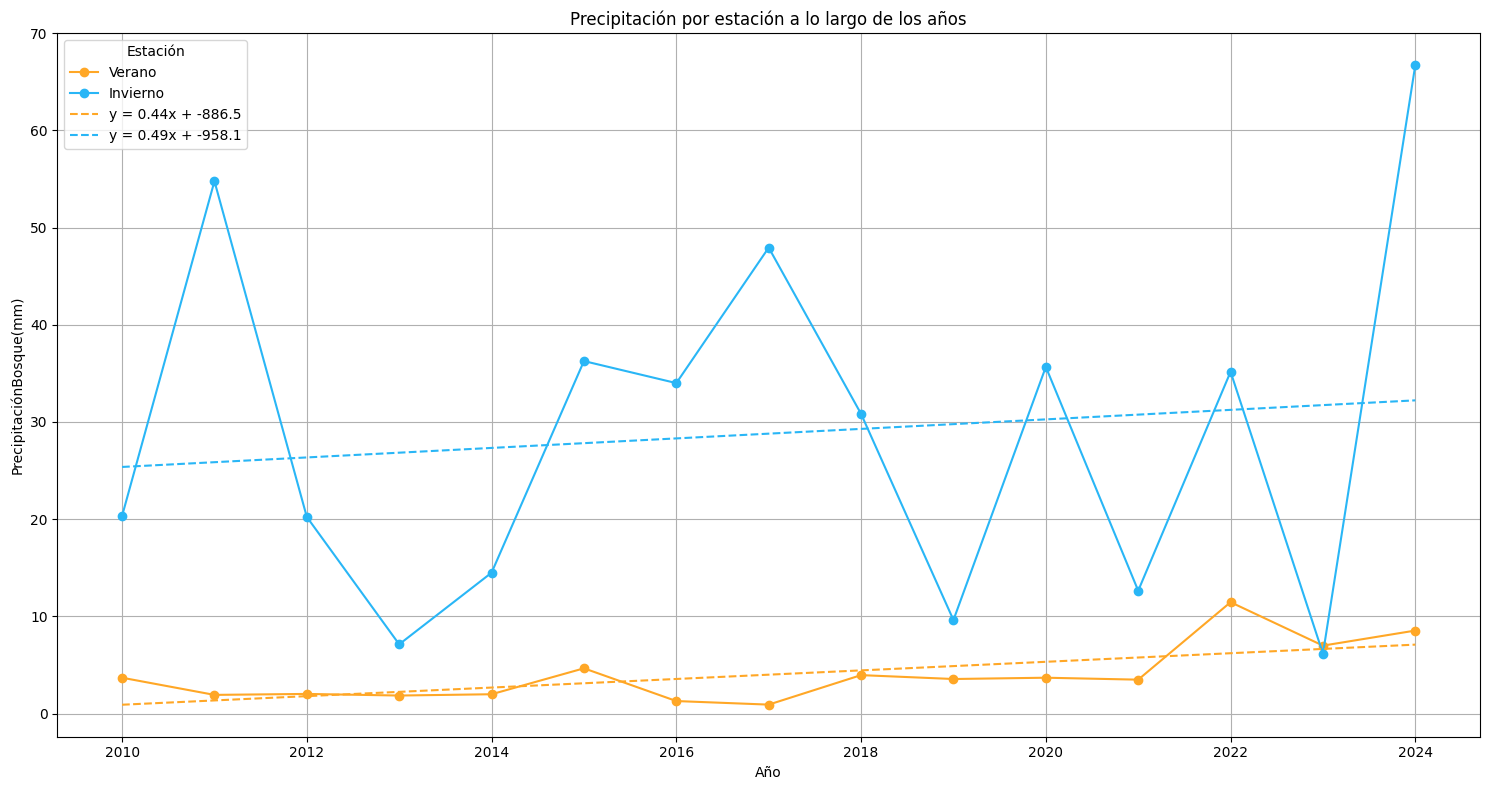

In [3]:
# Agrupar por estaci√≥n del a√±o y calcular promedios
# Filtramos por cada a√±o

columnas_a_promediar = [
    'Precipitaci√≥nBosque(mm)',
    'H_RelativaBosque(%)',
    'T_SueloQuebrada(C)',
    'T_AireQuebrada(C)'

]
estaciones = ['Verano', 'Oto√±o', 'Invierno', 'Primavera']

# Definimos funci√≥n para asignar estaci√≥n en el hemisferio sur


def mes_a_estacion(mes):
    if mes in [12, 1, 2]:
        return estaciones[0]
    elif mes in [3, 4, 5]:
        return estaciones[1]
    elif mes in [6, 7, 8]:
        return estaciones[2]
    elif mes in [9, 10, 11]:
        return estaciones[3]


colores_estacion = {
    'Verano': '#FFA726',      # Naranja
    'Oto√±o': '#8D6E63',       # Caf√©
    'Invierno': '#29B6F6',    # Celeste
    'Primavera': '#66BB6A'    # Verde
}

# Creamos una nueva columna 'Estaci√≥n' para agrupar por estaci√≥n del a√±o
df['Estaci√≥n'] = df['Fecha'].dt.month.apply(mes_a_estacion)
# Creamos una nueva columna 'A√±o' para agrupar por a√±o
df['A√±o'] = df['Fecha'].dt.year
# Agrupamos por a√±o y estaci√≥n, calculando el promedio de las columnas seleccionadas
promedios_a√±o_estacion = df.groupby(['A√±o', 'Estaci√≥n'])[
    columnas_a_promediar].mean().reset_index()
# Ordenamos las estaciones de acuerdo a su orden natural
promedios_a√±o_estacion['Estaci√≥n'] = pd.Categorical(
    promedios_a√±o_estacion['Estaci√≥n'], categories=estaciones, ordered=True)

# Graficamos Precipitaciones en verano he ivierno
dt_verano = promedios_a√±o_estacion[promedios_a√±o_estacion['Estaci√≥n'] == 'Verano']
dt_invierno = promedios_a√±o_estacion[promedios_a√±o_estacion['Estaci√≥n'] == 'Invierno']
plt.figure(figsize=(15, 8))
plt.plot(dt_verano['A√±o'], dt_verano['Precipitaci√≥nBosque(mm)'], marker='o',
         linestyle='-', label='Verano', color=colores_estacion['Verano'])
plt.plot(dt_invierno['A√±o'], dt_invierno['Precipitaci√≥nBosque(mm)'], marker='o',
         linestyle='-', label='Invierno', color=colores_estacion['Invierno'])

# Regresion lineal para las precipitaciones
# Verano
x_verano = dt_verano['A√±o']
y_verano = dt_verano['Precipitaci√≥nBosque(mm)']
pendiente_verano, intercepto_verano, r_value_verano, p_value_verano, std_err_verano = linregress(
    x_verano, y_verano)
y_pred = pendiente_verano * x_verano + intercepto_verano
x_np = x_verano.to_numpy()

ecuacion = f'y = {pendiente_verano:.2f}x + {intercepto_verano:.1f}'
plt.plot(x_np, y_pred, linestyle='--',
         color=colores_estacion['Verano'], label=f'{ecuacion}')

# Invierno
x_invierno = dt_invierno['A√±o']
y_invierno = dt_invierno['Precipitaci√≥nBosque(mm)']
pendiente_invierno, intercepto_invierno, r_value_invierno, p_value_invierno, std_err_invierno = linregress(
    x_invierno, y_invierno)
y_pred_invierno = pendiente_invierno * x_invierno + intercepto_invierno
x_np_invierno = x_invierno.to_numpy()
ecuacion_invierno = f'y = {pendiente_invierno:.2f}x + {intercepto_invierno:.1f}'
plt.plot(x_np_invierno, y_pred_invierno, linestyle='--',
         color=colores_estacion['Invierno'], label=f'{ecuacion_invierno}')

plt.title(f'Precipitaci√≥n por estaci√≥n a lo largo de los a√±os')
plt.xlabel('A√±o')
plt.ylabel('Precipitaci√≥nBosque(mm)')
plt.legend(title='Estaci√≥n')
plt.grid(True)
plt.tight_layout()
plt.show()

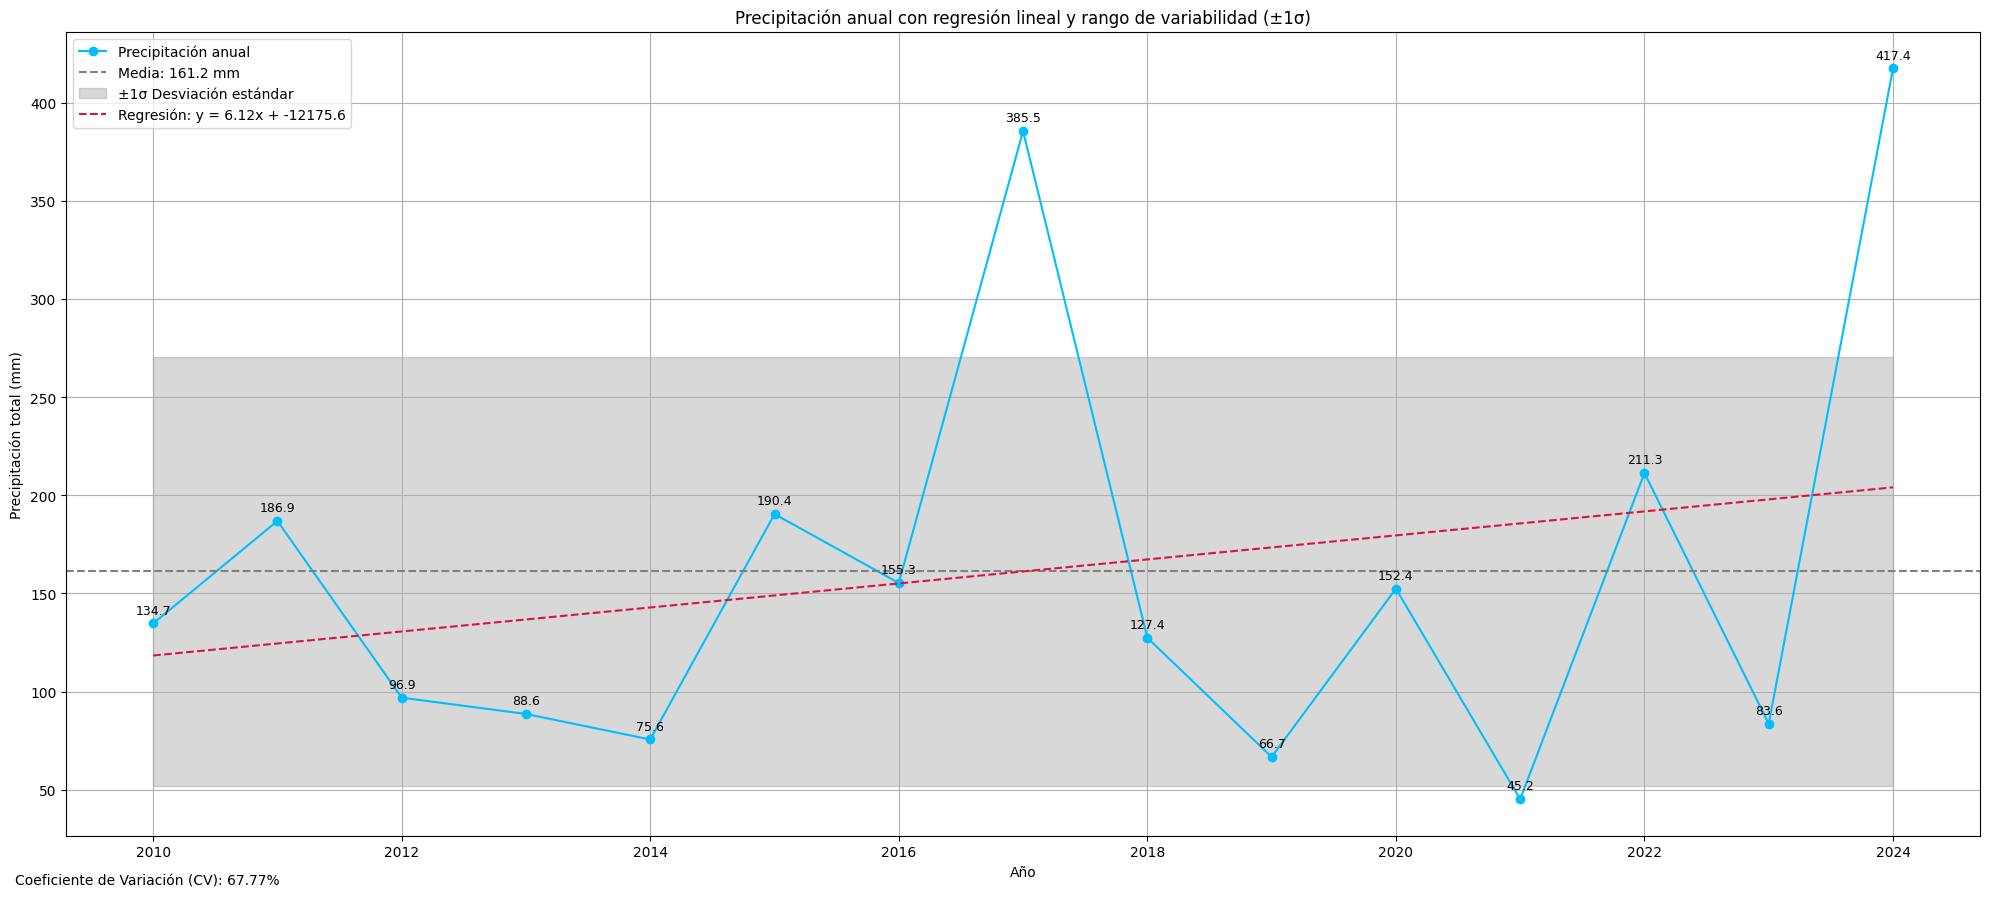

In [4]:
suma_precipitaciones = df.groupby('A√±o', observed=True)[
    'Precipitaci√≥nBosque(mm)'].sum().reset_index()

x = suma_precipitaciones['A√±o']
y = suma_precipitaciones['Precipitaci√≥nBosque(mm)']

# C√°lculo de regresi√≥n lineal
pendiente, intercepto, r_value, p_value, std_err = linregress(x, y)
y_pred = pendiente * x + intercepto

# C√°lculo de estad√≠sticos
media = y.mean()
desv_std = y.std()
cv = (desv_std / media) * 100

# Gr√°fico
plt.figure(figsize=(20, 9))
plt.plot(x, y, marker='o', linestyle='-',
         label='Precipitaci√≥n anual', color='deepskyblue')

# Media
plt.axhline(y=media, color='gray', linestyle='--',
            label=f'Media: {media:.1f} mm')

# Rango ¬±1 desviaci√≥n est√°ndar
plt.fill_between(x, media - desv_std, media + desv_std,
                 color='gray', alpha=0.3, label='¬±1œÉ Desviaci√≥n est√°ndar')

# L√≠nea de regresi√≥n
plt.plot(x, y_pred, color='crimson', linestyle='--',
         label=f'Regresi√≥n: y = {pendiente:.2f}x + {intercepto:.1f}')

# Mostrar valores
for xi, yi in zip(x, y):
    plt.text(xi, yi + 5, f'{yi:.1f}', ha='center', fontsize=9)

# Leyendas y formato
plt.title('Precipitaci√≥n anual con regresi√≥n lineal y rango de variabilidad (¬±1œÉ)')
plt.xlabel('A√±o')
plt.ylabel('Precipitaci√≥n total (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Mostrar CV
plt.figtext(
    0.01, 0.01, f'Coeficiente de Variaci√≥n (CV): {cv:.2f}%', fontsize=10)

plt.show()

## Humedad relativa por a√±o

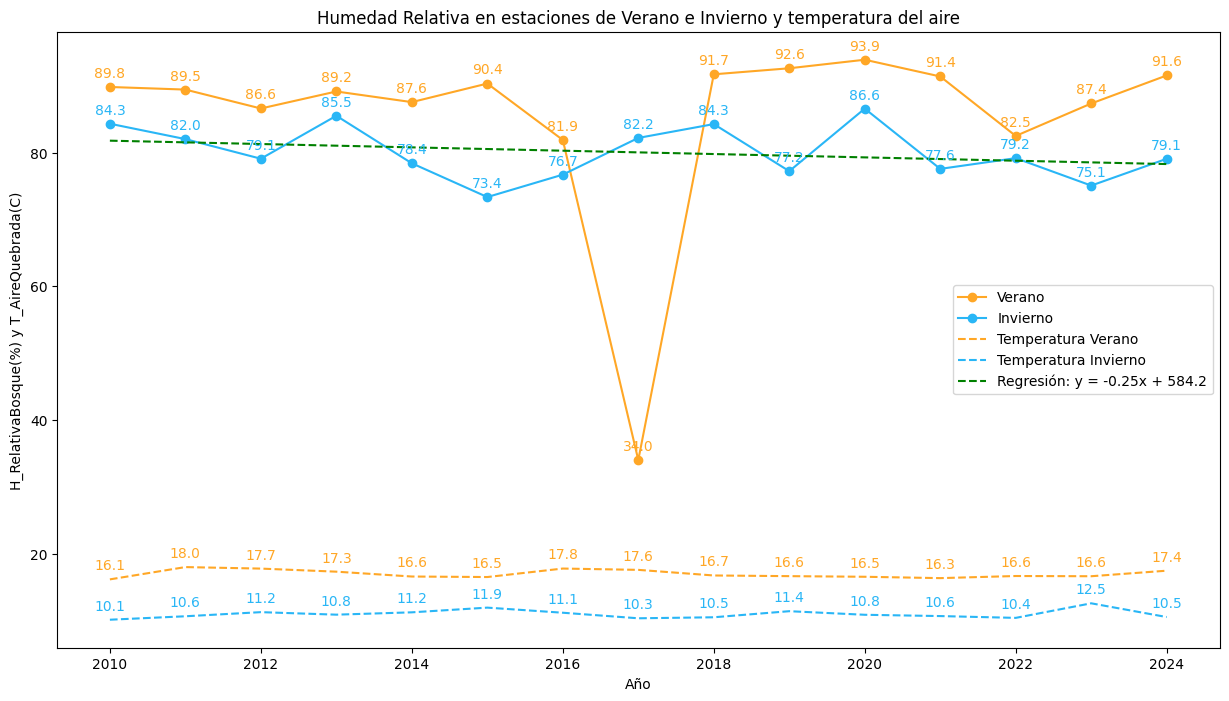

In [5]:
df_veranoH = promedios_a√±o_estacion[promedios_a√±o_estacion['Estaci√≥n'] == 'Verano']
df_inviernoH = promedios_a√±o_estacion[promedios_a√±o_estacion['Estaci√≥n'] == 'Invierno']
plt.figure(figsize=(15, 8))

# Graficamos para verano
plt.plot(df_veranoH['A√±o'], df_veranoH['H_RelativaBosque(%)'], marker='o',
         linestyle='-', label='Verano', color=colores_estacion['Verano'])
# Graficamos para invierno
plt.plot(df_inviernoH['A√±o'], df_inviernoH['H_RelativaBosque(%)'], marker='o',
         linestyle='-', label='Invierno', color=colores_estacion['Invierno'])
for i, valor in enumerate(df_veranoH['H_RelativaBosque(%)']):
    plt.text(df_veranoH['A√±o'].iloc[i], valor + 1,
             f'{valor:.1f}', ha='center', va='bottom', fontsize=10, color=colores_estacion['Verano'])
for i, valor in enumerate(df_inviernoH['H_RelativaBosque(%)']):
    plt.text(df_inviernoH['A√±o'].iloc[i], valor + 1,
             f'{valor:.1f}', ha='center', va='bottom', fontsize=10, color=colores_estacion['Invierno'])

plt.plot(df_veranoH['A√±o'], df_veranoH['T_AireQuebrada(C)'], linestyle='--',
         color=colores_estacion['Verano'], label='Temperatura Verano')
plt.plot(df_inviernoH['A√±o'], df_inviernoH['T_AireQuebrada(C)'], linestyle='--',
         color=colores_estacion['Invierno'], label='Temperatura Invierno')

for i, valor in enumerate(df_veranoH['T_AireQuebrada(C)']):
    plt.text(df_veranoH['A√±o'].iloc[i], valor + 1,
             f'{valor:.1f}', ha='center', va='bottom', fontsize=10, color=colores_estacion['Verano'])
for i, valor in enumerate(df_inviernoH['T_AireQuebrada(C)']):
    plt.text(df_inviernoH['A√±o'].iloc[i], valor + 1,
             f'{valor:.1f}', ha='center', va='bottom', fontsize=10, color=colores_estacion['Invierno'])

# Regresi√≥n lineal para invierno
x_invierno = df_inviernoH['A√±o'].to_numpy()
y_inviernoH = df_inviernoH['H_RelativaBosque(%)'].to_numpy()
pendiente_inviernoH, intercepto_inviernoH, r_value_inviernoH, p_value_inviernoH, std_err_inviernoH = linregress(
    x_invierno, y_inviernoH)
y_pred_inviernoH = pendiente_inviernoH * x_invierno + intercepto_inviernoH

plt.plot(x_invierno, y_pred_inviernoH, color='green', linestyle='--',
         label=f'Regresi√≥n: y = {pendiente_inviernoH:.2f}x + {intercepto_inviernoH:.1f}')

plt.title(
    'Humedad Relativa en estaciones de Verano e Invierno y temperatura del aire')
plt.xlabel('A√±o')
plt.ylabel('H_RelativaBosque(%) y T_AireQuebrada(C)')
plt.legend()
plt.show()

#üå°Ô∏è ¬øHan aumentado las temperaturas m√≠nimas en los √∫ltimos a√±os, evidenciando calentamiento local?


###üìò Contexto, descripci√≥n y fuentes de los datos utilizados

Este proyecto tiene como prop√≥sito explorar y evidenciar posibles se√±ales del cambio clim√°tico a partir de registros meteorol√≥gicos locales, espec√≠ficamente desde La Serena, Chile, en base a lo que se puede observar directamente en nuestra ciudad.

Los datos provienen de la Direcci√≥n General de Aeron√°utica Civil (DGAC), instituci√≥n que gestiona y publica datos de estaciones meteorol√≥gicas a lo largo del pa√≠s. Se utilizaron los registros de temperatura m√≠nima y m√°xima horaria desde mediados del siglo XX hasta la actualidad.

Los archivos utilizados en este an√°lisis son:

* tmin.csv: Contiene los valores de temperatura m√≠nima diaria.

* tmax.csv: Contiene los valores de temperatura m√°xima diaria.

Cada archivo incluye:

* C√≥digo Nacional de la estaci√≥n

* Fecha de medici√≥n

* Valor de temperatura

* Hora de captura del dato





In [6]:
# üîß Funci√≥n para procesar cada archivo CSV
def procesar_csv(nombre_archivo, valor_nombre):
    # Leer CSV sin encabezado con separador ';'
    df = pd.read_csv(nombre_archivo, sep=';', header=None, names=[
                     'CodigoNacional', 'Fecha', valor_nombre, 'FechaHora_Valor'])

    # Convertir la columna 'Fecha' a datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')

    # Normalizar la fecha para eliminar la hora
    df['Fecha'] = df['Fecha'].dt.normalize()

    # Convertir a n√∫mero el valor de temperatura
    df[valor_nombre] = pd.to_numeric(df[valor_nombre], errors='coerce')

    # Eliminar filas sin fecha o formato v√°lido
    df = df.dropna(subset=['Fecha'])

    # Dejar solo columnas que utilizaremos para la investigacion
    df = df[['CodigoNacional', 'Fecha', valor_nombre]]

    return df


# Procesar archivos tmax y tmin
df_tmax = procesar_csv("csv/tmax.csv", "TMax")
df_tmin = procesar_csv("csv/tmin.csv", "TMin")

# tomar desde cierto a√±o en adelante
df_tmin = df_tmin[df_tmin['Fecha'].dt.year >= 1963]
df_tmax = df_tmax[df_tmax['Fecha'].dt.year >= 1963]

/var/folders/jv/dbjl1jdn6s5c_yt737h20gsw0000gn/T/ipykernel_28374/73896045.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
/var/folders/jv/dbjl1jdn6s5c_yt737h20gsw0000gn/T/ipykernel_28374/73896045.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')


# La Serena

## üìà  Visualizaci√≥n de tendencias 

Mostramos c√≥mo han evolucionado las temperaturas m√≠nimas y m√°ximas promedio a lo largo de los a√±os.


In [7]:
df_tmin['A√±o'] = df_tmin['Fecha'].dt.year
df_grouped = df_tmin.groupby('A√±o')['TMin'].mean().reset_index()

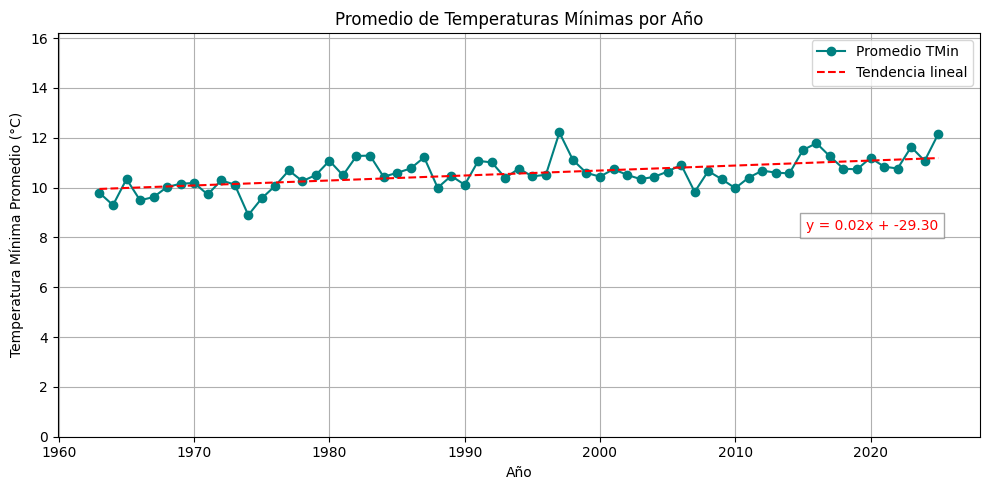

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['A√±o'], df_grouped['TMin'],
         marker='o', color='teal', label='Promedio TMin')

# üìâ L√≠nea de tendencia (regresi√≥n lineal)
x = df_grouped['A√±o']
y = df_grouped['TMin']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color='red', label='Tendencia lineal')

# Ecuaci√≥n de la l√≠nea de tendencia
pendiente = z[0]
interseccion = z[1]
eq_text = f'y = {pendiente:.2f}x + {interseccion:.2f}'

# Posicionar el texto m√°s abajo del final de la l√≠nea
x_pos = x.iloc[-1]
y_pos = p(x_pos) - 3.0

plt.text(x_pos, y_pos, eq_text,
         fontsize=10, color='red', ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.ylim(bottom=0)
plt.title('Promedio de Temperaturas M√≠nimas por A√±o')
plt.xlabel('A√±o')
plt.ylabel('Temperatura M√≠nima Promedio (¬∞C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
y_max = df_grouped['TMin'].max()
plt.ylim(bottom=0, top=y_max + 4)

plt.show()

### ¬øEl aumento de temperaturas se manifiesta tanto en verano como en invierno?

In [9]:
def calcular_promedios_por_estacion(df_tmin, df_tmax, meses_estacion, nombre_estacion):
    # Filtrar por los meses de la estaci√≥n
    df_tmin_est = df_tmin[df_tmin['Fecha'].dt.month.isin(
        meses_estacion)].copy()
    df_tmax_est = df_tmax[df_tmax['Fecha'].dt.month.isin(
        meses_estacion)].copy()

    # Agregar columna A√±o
    df_tmin_est['A√±o'] = df_tmin_est['Fecha'].dt.year
    df_tmax_est['A√±o'] = df_tmax_est['Fecha'].dt.year

    # Filtrar desde 1963
    df_tmin_est = df_tmin_est[df_tmin_est['A√±o'] >= 1963]
    df_tmax_est = df_tmax_est[df_tmax_est['A√±o'] >= 1963]

    # Agrupar y calcular promedios
    df_min_avg = df_tmin_est.groupby('A√±o')['TMin'].mean().reset_index()
    df_max_avg = df_tmax_est.groupby('A√±o')['TMax'].mean().reset_index()

    # Unir TMin y TMax
    df_merge = pd.merge(df_min_avg, df_max_avg, on='A√±o', how='inner')

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df_merge['A√±o'], df_merge['TMin'],
             marker='o', color='skyblue', label='TMin')
    plt.plot(df_merge['A√±o'], df_merge['TMax'],
             marker='o', color='salmon', label='TMax')

    # L√≠neas de regresi√≥n
    z_min = np.polyfit(df_merge['A√±o'], df_merge['TMin'], 1)
    p_min = np.poly1d(z_min)
    plt.plot(df_merge['A√±o'], p_min(df_merge['A√±o']),
             '--', color='blue', label='Tendencia TempMin')

    z_max = np.polyfit(df_merge['A√±o'], df_merge['TMax'], 1)
    p_max = np.poly1d(z_max)
    plt.plot(df_merge['A√±o'], p_max(df_merge['A√±o']),
             '--', color='red', label='Tendencia TempMax')

    # Mostrar ecuaciones centradas
    x_middle = df_merge['A√±o'].iloc[len(df_merge) // 2]
    plt.text(x_middle, p_min(x_middle) + -3, f'y = {z_min[0]:.2f}x + {z_min[1]:.2f}',
             fontsize=10, color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.6))

    plt.text(x_middle, p_max(x_middle) + 2, f'y = {z_max[0]:.2f}x + {z_max[1]:.2f}',
             fontsize=10, color='red', ha='center', bbox=dict(facecolor='white', alpha=0.6))

    # T√≠tulo y ejes
    plt.title(
        f'{nombre_estacion} en Chile (desde 1963): Promedio de TempMin y TempMax por A√±o')
    plt.xlabel('A√±o')
    plt.ylabel('Temperatura (¬∞C)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Ajustar l√≠mites
    y_max = max(df_merge['TMin'].max(), df_merge['TMax'].max())
    plt.ylim(bottom=0, top=y_max + 4)

    plt.show()

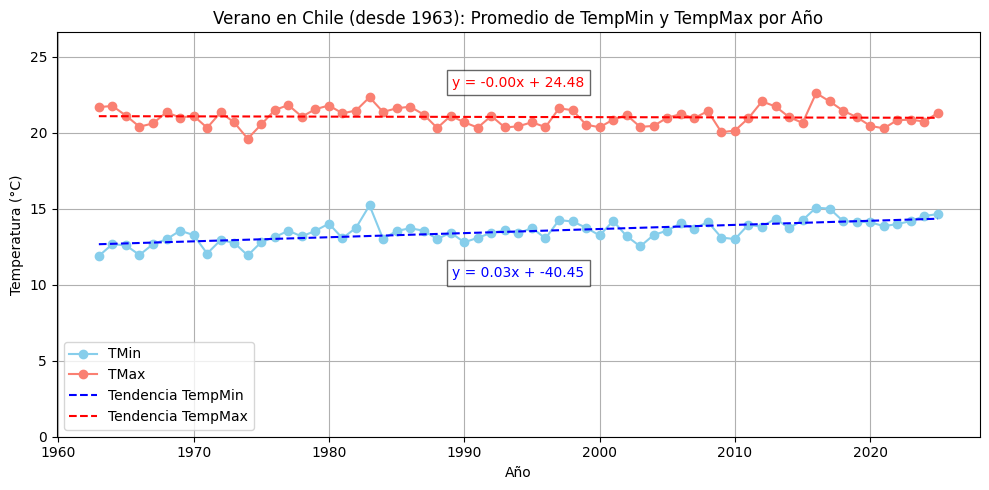

In [10]:
calcular_promedios_por_estacion(df_tmin, df_tmax, [12, 1, 2], "Verano")

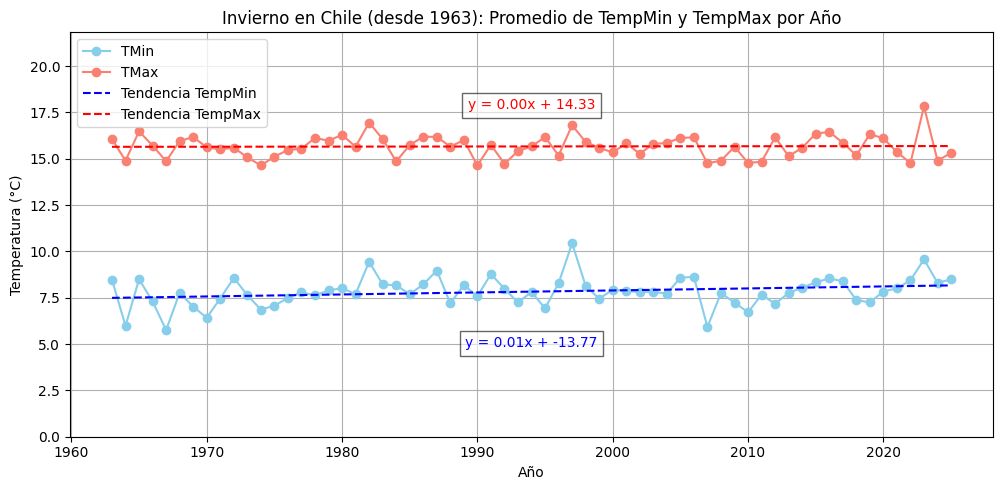

In [11]:
calcular_promedios_por_estacion(df_tmin, df_tmax, [6, 7, 8], "Invierno")

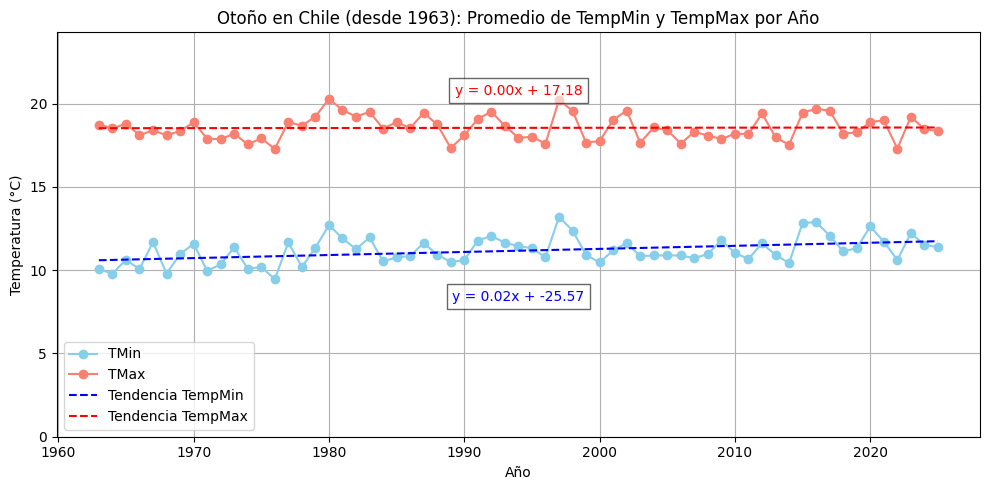

In [12]:
calcular_promedios_por_estacion(df_tmin, df_tmax, [3, 4, 5], "Oto√±o")

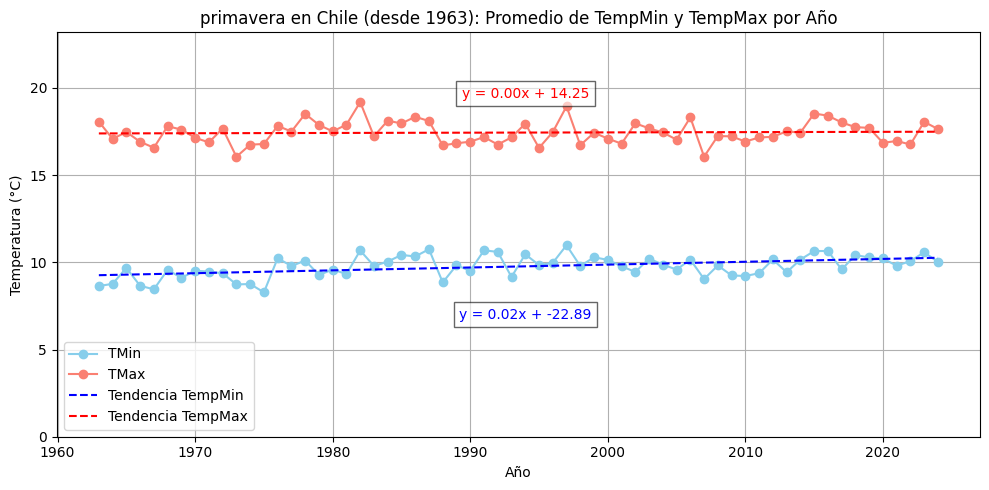

In [13]:
calcular_promedios_por_estacion(df_tmin, df_tmax, [9, 10, 11], "primavera")

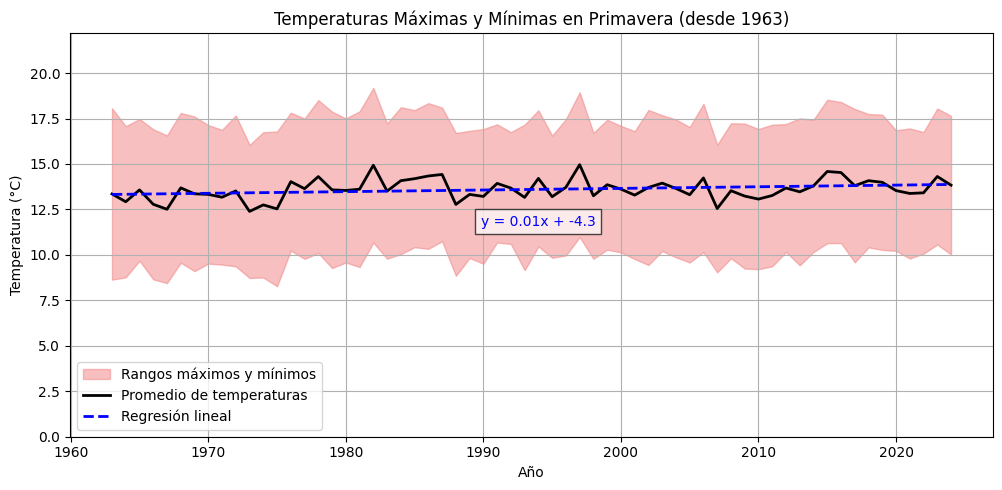

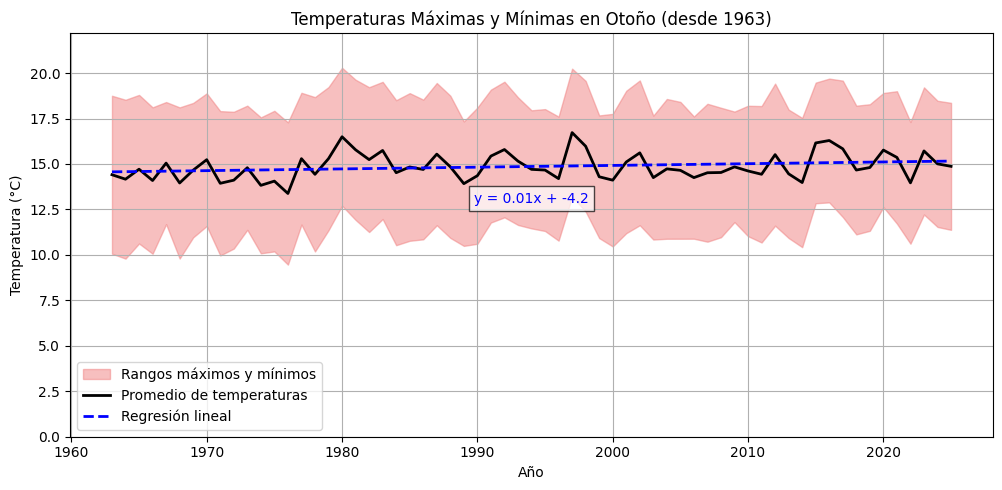

In [14]:
def graficar_fill_promedio_y_regresion(df_tmin, df_tmax, meses_estacion, nombre_estacion):
    # Filtrar por los meses de la estaci√≥n
    df_tmin_est = df_tmin[df_tmin['Fecha'].dt.month.isin(
        meses_estacion)].copy()
    df_tmax_est = df_tmax[df_tmax['Fecha'].dt.month.isin(
        meses_estacion)].copy()

    # Agregar columna A√±o
    df_tmin_est['A√±o'] = df_tmin_est['Fecha'].dt.year
    df_tmax_est['A√±o'] = df_tmax_est['Fecha'].dt.year

    # Filtrar desde 1963
    df_tmin_est = df_tmin_est[df_tmin_est['A√±o'] >= 1963]
    df_tmax_est = df_tmax_est[df_tmax_est['A√±o'] >= 1963]

    # Agrupar y calcular promedios
    df_min_avg = df_tmin_est.groupby('A√±o')['TMin'].mean().reset_index()
    df_max_avg = df_tmax_est.groupby('A√±o')['TMax'].mean().reset_index()

    # Unir TMin y TMax
    df_merge = pd.merge(df_min_avg, df_max_avg, on='A√±o', how='inner')

    # Preparar datos
    x = df_merge['A√±o']
    y1 = df_merge['TMax']
    y2 = df_merge['TMin']
    y_central = (y1 + y2) / 2

    # Calcular regresi√≥n lineal sobre el promedio
    z = np.polyfit(x, y_central, 1)
    p = np.poly1d(z)

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.fill_between(x, y1, y2, color='lightcoral', alpha=0.5,
                     label='Rangos m√°ximos y m√≠nimos')
    plt.plot(x, y_central, color='black', linewidth=2,
             label='Promedio de temperaturas')
    plt.plot(x, p(x), color='blue', linestyle='--',
             linewidth=2, label='Regresi√≥n lineal')

    # Mostrar ecuaci√≥n de regresi√≥n
    x_middle = x.iloc[len(x) // 2]
    plt.text(x_middle, p(x_middle) + -2, f'y = {z[0]:.2f}x + {z[1]:.1f}',
             fontsize=10, color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.7))

    # Etiquetas
    plt.title(
        f'Temperaturas M√°ximas y M√≠nimas en {nombre_estacion} (desde 1963)')
    plt.xlabel('A√±o')
    plt.ylabel('Temperatura (¬∞C)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.ylim(bottom=0, top=y_max + 10)
    plt.show()


graficar_fill_promedio_y_regresion(df_tmin, df_tmax, [9, 10, 11], "Primavera")

graficar_fill_promedio_y_regresion(df_tmin, df_tmax, [3, 4, 5], "Oto√±o")

# La Serena - Santiago

## üóÇÔ∏èüìö Contexto, descripci√≥n y fuentes de los datos utilizados üîçüåê
### üî∏ Contexto y descripci√≥n del proyecto

Nuestro proyecto se enfoc√≥ en el an√°lisis del comportamiento hist√≥rico de par√°metros meteorol√≥gicos entre dos ciudades de Chile: La Serena (Regi√≥n de Coquimbo) y Santiago (Quinta Normal, Regi√≥n Metropolitana). Para ello utilizamos datos de estaciones meteorol√≥gicas oficiales:

- üìç **Para La Serena**, datos de la estaci√≥n **La Florida**.  
- üìç **Para Santiago**, datos de la estaci√≥n **Quinta Normal**.

El an√°lisis tiene como objetivo identificar:

- Diferencias geogr√°ficas en el comportamiento t√©rmico.  
- Tendencias temporales asociadas al cambio clim√°tico en cada entorno.  
- Patrones clim√°ticos caracter√≠sticos de cada ciudad.

---


### üî∏ Pregunta a responder y fuente de los datos utilizados

Dentro del marco general de nuestro proyecto, una de las preguntas que nosotros buscamos responder es:

#### üå°Ô∏èüìà ¬øExiste alguna tendencia de temperatura a lo largo de los a√±os en ambas zonas de Chile? ü§î

Para responder esta pregunta, se utilizaron directamente archivos en formato CSV provenientes de las estaciones meteorol√≥gicas mencionadas anteriormente. Cada archivo contiene, por registro:

- C√≥digo identificatorio de la estaci√≥n  
- Fecha y hora exacta de medici√≥n  
- Valor de temperatura instant√°nea registrada

Los datos fueron obtenidos desde el portal oficial de la **Direcci√≥n Meteorol√≥gica de Chile**, dependiente de la **Direcci√≥n General de Aeron√°utica Civil (DGAC)**:

üîó [https://climatologia.meteochile.gob.cl/application/requerimiento/producto/RE3008](https://climatologia.meteochile.gob.cl/application/requerimiento/producto/RE3008)

<img src= "images/gosth.png" width="2000" height="1000" alt="Descripci√≥n de la imagen">

## üßπ**Preparaci√≥n de datos y su prop√≥sito en el proyecto** üóÇÔ∏èüìå

Para responder a la pregunta sobre si existe una tendencia en los cambios de temperatura a lo largo de los a√±os en Santiago y La Serena, los datos pasaron por una fase de preparaci√≥n que const√≥ de lo siguiente:
**1. Carga y limpieza inicial de los datos**

Al cargar los archivos CSV de cada zona, estos tenian caracter√≠sticas que requer√≠an limpieza:

- Separadores mixtos (; y ,)
- Encabezados mal formateados en la primera fila
- Columnas sin nombres asignados

Para una correcta interpretaci√≥n, se indico ambos separadores para la lectura, se asignaron nombres a las columnas y se corrigi√≥ el formato de fechas.


In [15]:
# Cargar los archivos CSV, indicando m√∫ltiples separadores y saltando la primera fila malformateada
df_coquimbo = pd.read_csv("csv/290004_XXXX_Temperatura_.csv",
                          sep='[;,]', engine='python', skiprows=1, header=None)
df_santiago = pd.read_csv("csv/330020_XXXX_Temperatura_.csv",
                          sep='[;,]', engine='python', skiprows=1, header=None)

# Asignar nombres a las columnas
df_coquimbo.columns = ['CodigoNacional', 'momento', 'Ts_Valor']
df_santiago.columns = ['CodigoNacional', 'momento', 'Ts_Valor']

**2. Conversi√≥n temporal y filtrado por rango de an√°lisis**

La columna de ("momento") se convirti√≥ a una de tipo "datetime". Luego, se extrajeron los campos **A√±o** y **Mes** para poder usarlos en una agrupaci√≥n posteriormente.

Como nuestro an√°lisis se enfoca en **tendencias recientes**, se aplic√≥ un filtro para conservar **√∫nicamente los datos desde el a√±o 2010** en adelante.


In [16]:
# Convertir la columna 'momento' al tipo datetime
df_coquimbo['momento'] = pd.to_datetime(df_coquimbo['momento'], dayfirst=True)
df_santiago['momento'] = pd.to_datetime(df_santiago['momento'], dayfirst=True)

# Extraer a√±o y mes desde la columna de fechas
df_coquimbo['A√±o'] = df_coquimbo['momento'].dt.year
df_coquimbo['Mes'] = df_coquimbo['momento'].dt.month

df_santiago['A√±o'] = df_santiago['momento'].dt.year
df_santiago['Mes'] = df_santiago['momento'].dt.month

# Filtrar para quedarnos solo con los registros desde el a√±o 2010
df_coquimbo = df_coquimbo[df_coquimbo['A√±o'] >= 2010]
df_santiago = df_santiago[df_santiago['A√±o'] >= 2010]

**3. Preparacion de las temperaturas medias anuales**

Se calcularon las medias anuales de temperatura para cada ciudad. De esta manera tenemos una **visi√≥n general** del comportamiento climatico a lo largo de los a√±os y a la vez facilita la aplicaci√≥n regresi√≥n lineal.

In [17]:
# Calcular la temperatura media anual para cada ciudad
coquimbo_anual = df_coquimbo.groupby('A√±o')['Ts_Valor'].mean().reset_index()
santiago_anual = df_santiago.groupby('A√±o')['Ts_Valor'].mean().reset_index()

**3. Preparacion de las temperaturas por estaciones del a√±o**

A cada registro se le asign√≥ una estaci√≥n (primavera, verano, oto√±o, invierno) seg√∫n el mes de medici√≥n. Asi calcululamos la **temperatura promedio por estaci√≥n y a√±o**, de esta manera podemos observar **cambios espec√≠ficos en cada √©poca del a√±o**, detectando si el aumento de temperatura es mas brusco en una estaci√≥n en particular.

In [18]:
# Funci√≥n para asignar estaci√≥n del a√±o seg√∫n el mes
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Oto√±o'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Primavera'


# Aplicar la funci√≥n a cada DataFrame
df_coquimbo['Estacion'] = df_coquimbo['Mes'].apply(obtener_estacion)
df_santiago['Estacion'] = df_santiago['Mes'].apply(obtener_estacion)

# Agrupar por A√±o y Estaci√≥n para calcular temperatura promedio estacional
coquimbo_estacional = df_coquimbo.groupby(['A√±o', 'Estacion'])[
    'Ts_Valor'].mean().reset_index()
santiago_estacional = df_santiago.groupby(['A√±o', 'Estacion'])[
    'Ts_Valor'].mean().reset_index()

### üìâüîç **Visualizaci√≥n de los datos y Conclusiones** üßæüìä

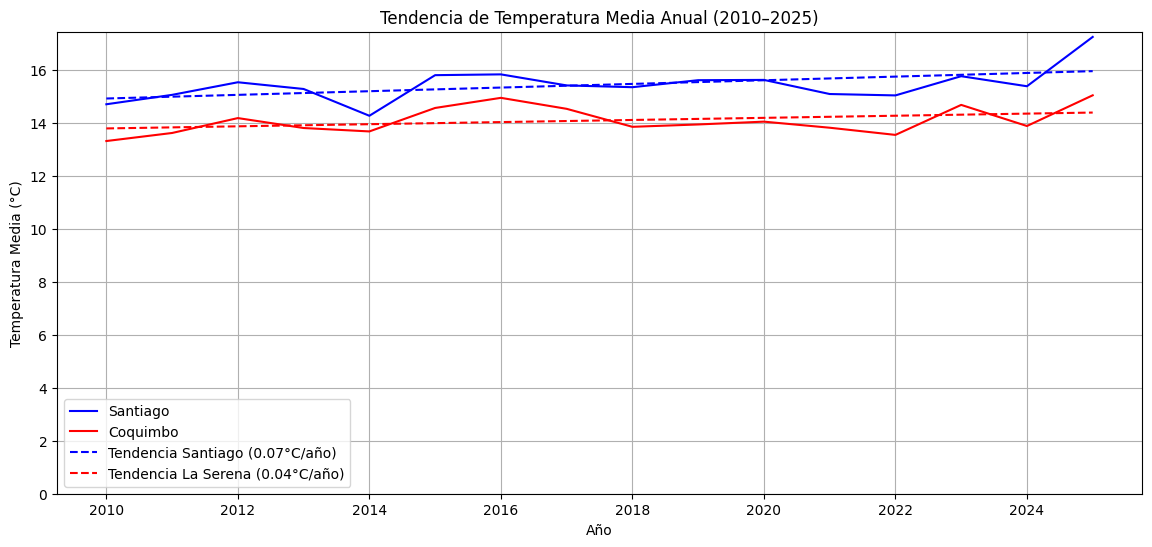

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Regresi√≥n lineal directamente sobre los datos ya filtrados
slope_s, intercept_s, _, _, _ = linregress(
    santiago_anual['A√±o'], santiago_anual['Ts_Valor'])
slope_c, intercept_c, _, _, _ = linregress(
    coquimbo_anual['A√±o'], coquimbo_anual['Ts_Valor'])

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=santiago_anual, x='A√±o', y='Ts_Valor',
             label='Santiago', color='blue')
sns.lineplot(data=coquimbo_anual, x='A√±o', y='Ts_Valor',
             label='Coquimbo', color='red')

# Agregar l√≠neas de tendencia
plt.plot(santiago_anual['A√±o'], slope_s * santiago_anual['A√±o'] + intercept_s,
         color='blue', linestyle='--', label=f'Tendencia Santiago ({slope_s:.2f}¬∞C/a√±o)')
plt.plot(coquimbo_anual['A√±o'], slope_c * coquimbo_anual['A√±o'] + intercept_c,
         color='red', linestyle='--', label=f'Tendencia La Serena ({slope_c:.2f}¬∞C/a√±o)')

# Personalizaci√≥n
plt.title('Tendencia de Temperatura Media Anual (2010‚Äì2025)')
plt.xlabel('A√±o')
plt.ylabel('Temperatura Media (¬∞C)')
plt.ylim(0)
plt.grid(True)
plt.legend()
plt.show()

### **üå°Ô∏èüìà¬øExiste una tendencia de temperatura a lo largo de los a√±os en ambas zonas de Chile?**


En base a los datos y el grafico mostrado, podemos llegar a la conclusi√≥n, de que **si** existe la presencia de una tendencia de temperatura en ambas zonas, los ultimos 15 a√±os. La regresion lineal aplicada sobre los datos, nos indica que la temperatura a aumentado de forma gradual tras los a√±os, siendo la mas afectada Santiago con una media de aumento de 0.07 ¬∞C por a√±o, y en el caso de de La Serena ha habido un aumento de 0.04 ¬∞C por a√±o. En conjunto, los datos respaldan la existencia de una tendencia sostenida de aumento de temperatura en ambas zonas, lo cual es coherente con los efectos del cambio clim√°tico observados a nivel nacional y global.

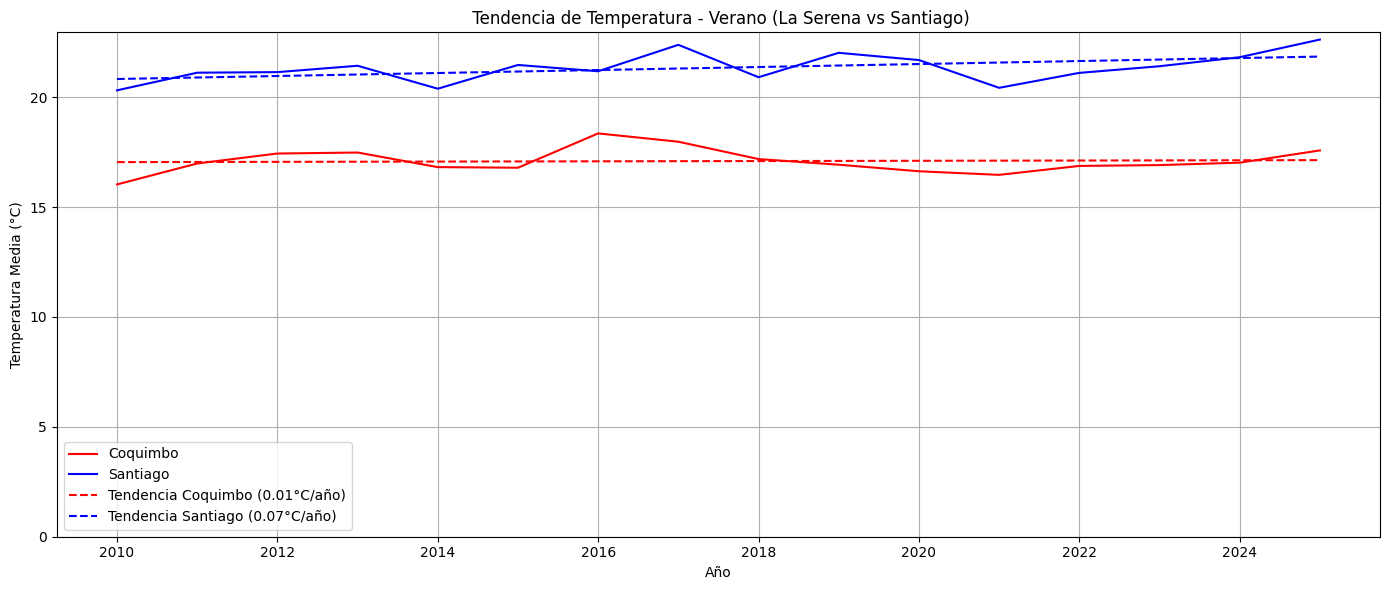

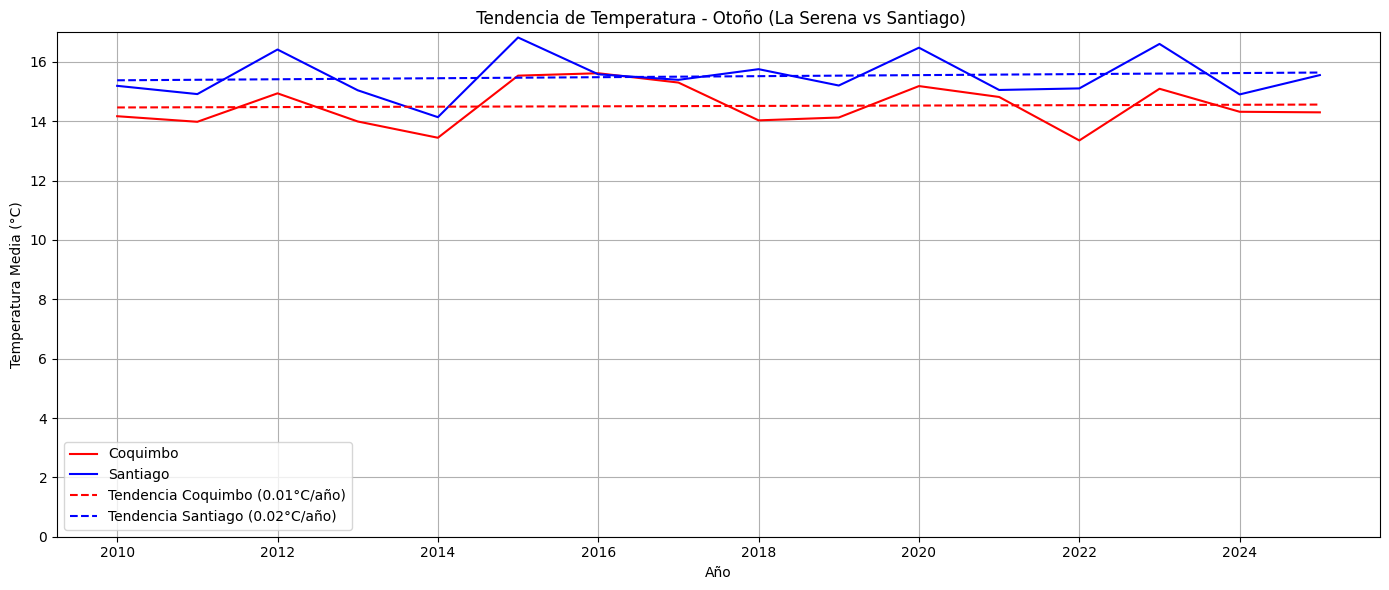

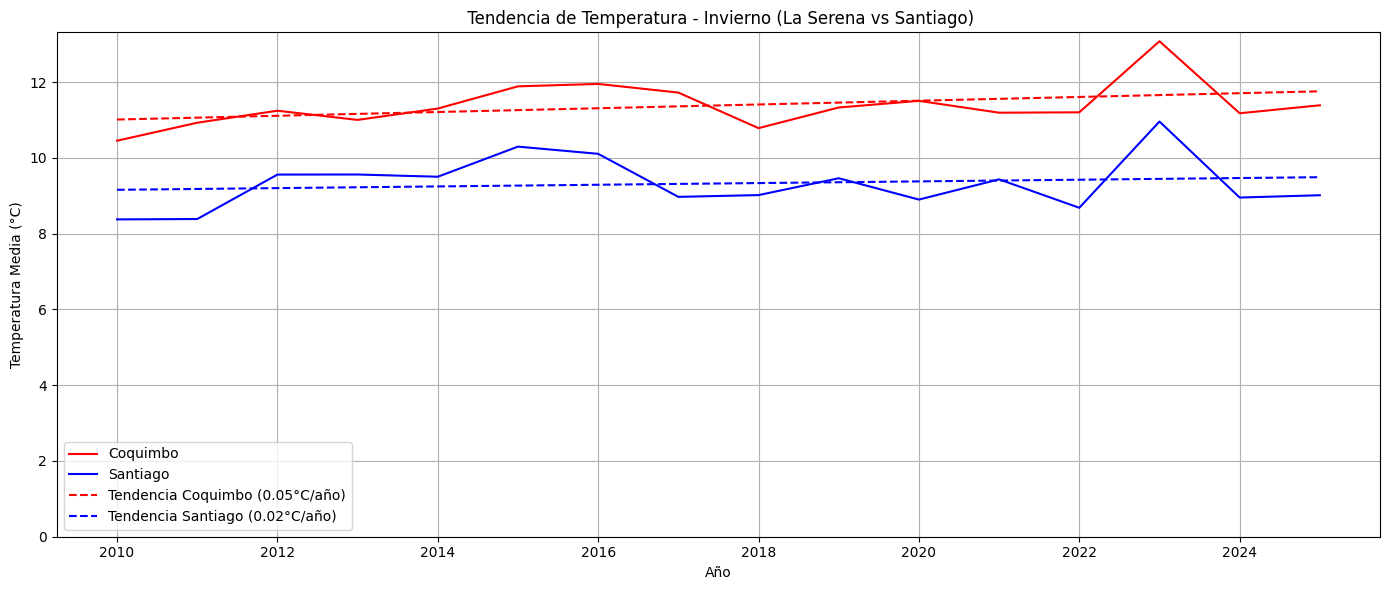

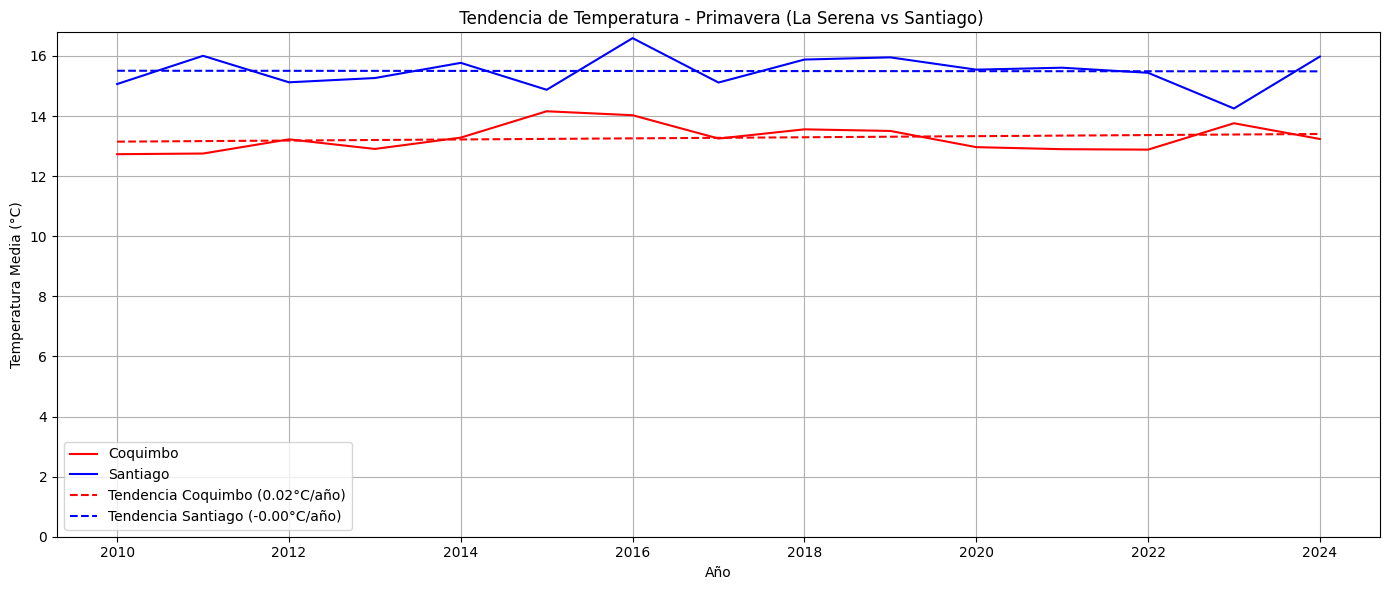

In [20]:
# Orden fijo de estaciones y colores
orden_estaciones = ['Verano', 'Oto√±o', 'Invierno', 'Primavera']
colores = {
    'Coquimbo': 'red',
    'Santiago': 'blue'
}

# Crear un gr√°fico por estaci√≥n
for estacion in orden_estaciones:
    # Filtrar datos para la estaci√≥n
    datos_c = coquimbo_estacional[coquimbo_estacional['Estacion'] == estacion]
    datos_s = santiago_estacional[santiago_estacional['Estacion'] == estacion]

    # Crear figura
    plt.figure(figsize=(14, 6))

    # L√≠nea base de datos
    sns.lineplot(data=datos_c, x='A√±o', y='Ts_Valor',
                 label='Coquimbo', color=colores['Coquimbo'])
    sns.lineplot(data=datos_s, x='A√±o', y='Ts_Valor',
                 label='Santiago', color=colores['Santiago'])

    # Regresiones lineales
    pendiente_c, inter_c, _, _, _ = linregress(
        datos_c['A√±o'], datos_c['Ts_Valor'])
    pendiente_s, inter_s, _, _, _ = linregress(
        datos_s['A√±o'], datos_s['Ts_Valor'])

    # L√≠neas de tendencia
    plt.plot(datos_c['A√±o'], pendiente_c * datos_c['A√±o'] + inter_c,
             color=colores['Coquimbo'], linestyle='--', label=f'Tendencia Coquimbo ({pendiente_c:.2f}¬∞C/a√±o)')

    plt.plot(datos_s['A√±o'], pendiente_s * datos_s['A√±o'] + inter_s,
             color=colores['Santiago'], linestyle='--', label=f'Tendencia Santiago ({pendiente_s:.2f}¬∞C/a√±o)')

    # Personalizar gr√°fico
    plt.title(
        f' Tendencia de Temperatura - {estacion} (La Serena vs Santiago)')
    plt.xlabel('A√±o')
    plt.ylabel('Temperatura Media (¬∞C)')
    plt.ylim(0)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### ‚òÄÔ∏è‚ùì‚ùÑÔ∏è **¬øLos veranos se est√°n volviendo m√°s calurosos? ¬øQu√© estaci√≥n del a√±o muestra mayor aumento de temperatura en Santiago y La Serena?** üìä

El analisis por estaciones muestra que los cambios no se dan de manera uniforme para todas ellas, sino que en ambas ciudades las temperaturas incrementan con mayor intensidad dependiendo de la estacion en que se encuentren, primeramente tenemos que los veranos han aumentado progresivamente para Santiago de una forma mas agresiva si comparamos con La Serena, ya que para Santiago ha ido aumentando 0.07 ¬∞c por a√±o mientras que en La Serena las temperarutas se han mantenido mas estable en esta estacion, contando con un aumento de 0.01 ¬∞c por a√±o.Entonces los veranos para Santiago se han vuelto mucho mas calurosos, tanto asi que es la estacion con mayor cambio de temperatura para la ciudad tras los ultimos 15 a√±os, mientras que La Serena se puede observar como la estacion ccon mayor cambio de temperatura ha sido el invierno con un 0.05¬∞C por a√±o. En conclusi√≥n podemos ver que la temperatura aumenta segun la estacion del a√±o y que el verano en Santiago y el invierno en La Serena son los mas afectados.

# An√°lisis de la Evoluci√≥n de Temperaturas en Santiago (2010-2025)

## 1. Contexto, descripci√≥n y fuentes de los datos utilizados

Para analizar la evoluci√≥n de las temperaturas en la regi√≥n de Santiago entre 2010 y 2025, se utilizaron datos hist√≥ricos de temperaturas m√≠nimas y m√°ximas  obtenidos de la Direcci√≥n General de Aeron√°utica Civil (DGAC) de Chile.
 
Estos datos corresponden a registros oficiales de estaciones meteorol√≥gicas , almacenados en archivos CSV con formato separado por punto y coma (‚Äú;‚Äù).  
La DGAC es una fuente  que provee informaci√≥n meteorol√≥gica para distintos fines aeron√°uticos y de investigaci√≥n ambiental y representatividad de los datos.

Los datos fueron obtenidos desde la Direcci√≥n Meteorol√≥gica de Chile, dependiente de la Direcci√≥n General de Aeron√°utica Civil (DGAC):
[https://climatologia.meteochile.gob.cl/application/informacion/fichaDeEstacion/330020](https://climatologia.meteochile.gob.cl/application/informacion/fichaDeEstacion/330020)

## 2. Preparaci√≥n y procesamiento de los datos 
 - Lectura y separaci√≥n de datos desde archivos CSV.
 - Conversi√≥n de fechas y temperaturas a formatos adecuados.
 - Uni√≥n de datos de Tmin y Tmax por fecha.
 - C√°lculo de temperatura promedio diaria.
 - Se realizo el filtrado para los a√±os 2010 a 2025.

In [21]:
def procesar_datos(ruta_min, ruta_max):
    col_min = pd.read_csv(ruta_min).iloc[:, 0].str.split(';', expand=True)
    col_max = pd.read_csv(ruta_max).iloc[:, 0].str.split(';', expand=True)

    df_min = pd.DataFrame({
        'fecha': pd.to_datetime(col_min[1], format='%d-%m-%Y %H:%M:%S', errors='coerce').dt.date,
        'Tmin': pd.to_numeric(col_min[2], errors='coerce')
    })

    df_max = pd.DataFrame({
        'fecha': pd.to_datetime(col_max[1], format='%d-%m-%Y %H:%M:%S', errors='coerce').dt.date,
        'Tmax': pd.to_numeric(col_max[2], errors='coerce')
    })

    df = pd.merge(df_min, df_max, on='fecha').dropna()
    df['a√±o'] = pd.to_datetime(df['fecha']).dt.year
    df = df[(df['a√±o'] >= 2010) & (df['a√±o'] <= 2025)]
    df['Tprom'] = (df['Tmin'] + df['Tmax']) / 2
    return df

# Cargar datos
santiago_df = procesar_datos('csv/330020_XXXX_TMinima_.csv',
                             'csv/330020_XXXX_TMaxima_.csv')


## 3. Visualizaci√≥n: Distribuci√≥n de temperaturas con Boxplot

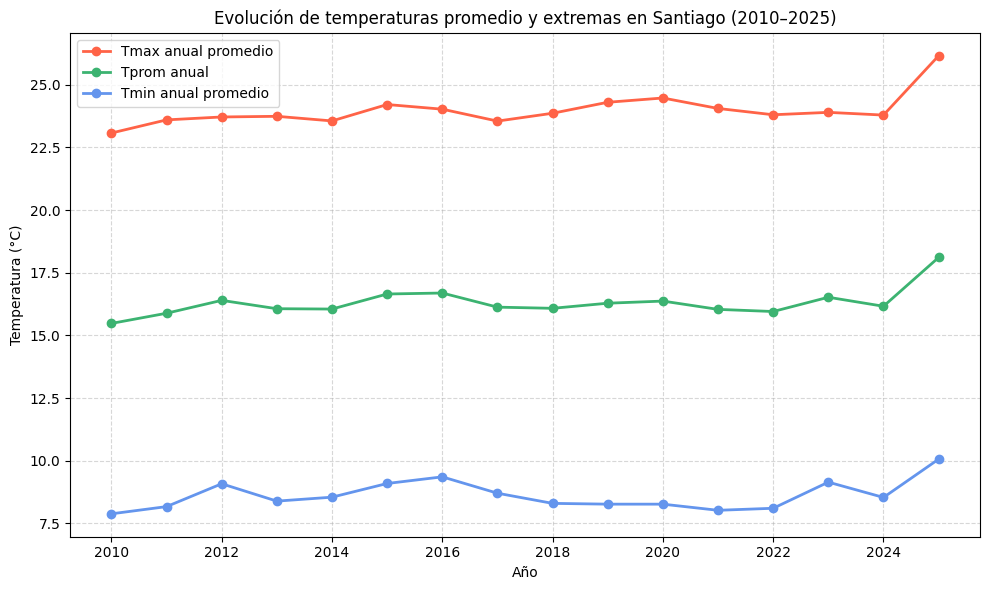

In [22]:

df_anual = santiago_df.groupby('a√±o').agg({
    'Tprom': 'mean',
    'Tmax': 'mean',
    'Tmin': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_anual['a√±o'], df_anual['Tmax'], marker='o', label='Tmax anual promedio', color='tomato', linewidth=2)
plt.plot(df_anual['a√±o'], df_anual['Tprom'], marker='o', label='Tprom anual', color='mediumseagreen', linewidth=2)
plt.plot(df_anual['a√±o'], df_anual['Tmin'], marker='o', label='Tmin anual promedio', color='cornflowerblue', linewidth=2)

plt.title('Evoluci√≥n de temperaturas promedio y extremas en Santiago (2010‚Äì2025)')
plt.xlabel('A√±o')
plt.ylabel('Temperatura (¬∞C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 4. C√°lculo del cambio en la temperatura promedio anual

In [23]:
df_anual = santiago_df.groupby('a√±o').agg({'Tprom': 'mean'}).reset_index()

primer_a√±o = df_anual['a√±o'].min()
ultimo_a√±o = df_anual['a√±o'].max()

prom_primero = df_anual.loc[df_anual['a√±o'] == primer_a√±o, 'Tprom'].values[0]
prom_ultimo = df_anual.loc[df_anual['a√±o'] == ultimo_a√±o, 'Tprom'].values[0]

cambio = prom_ultimo - prom_primero

print(f"Entre {primer_a√±o} y {ultimo_a√±o}, la temperatura promedio anual en Santiago aument√≥ {cambio:.2f} ¬∞C.")

Entre 2010 y 2025, la temperatura promedio anual en Santiago aument√≥ 2.63 ¬∞C.


## 5. Respuesta breve a la hip√≥tesis

In [24]:
respuesta = f"""
En Santiago, entre {primer_a√±o} y {ultimo_a√±o} las temperaturas promedio anuales aumentaron aproximadamente {cambio:.2f} ¬∞C. 
El boxplot muestra que las temperaturas extremas (m√°ximas y m√≠nimas) presentan una mayor variabilidad,
reflejando a√±os cada vez m√°s calurosos y cambios m√°s marcados, lo que indica una tendencia general al 
calentamiento regional.
"""
print(respuesta)


En Santiago, entre 2010 y 2025 las temperaturas promedio anuales aumentaron aproximadamente 2.63 ¬∞C. 
El boxplot muestra que las temperaturas extremas (m√°ximas y m√≠nimas) presentan una mayor variabilidad,
reflejando a√±os cada vez m√°s calurosos y cambios m√°s marcados, lo que indica una tendencia general al 
calentamiento regional.

